# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load bed file

In [2]:
bed_columns = ["chr", "start", "end"]
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed", names=bed_columns )
df_k4

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [3]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:, "start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


In [4]:
type( df_k4 )

pandas.core.frame.DataFrame

# Work with data frames

In [5]:
df_k4.columns

Index(['chr', 'start', 'end', 'width'], dtype='object')

In [6]:
df_k4.index

RangeIndex(start=0, stop=3830, step=1)

In [7]:
df_k4.values

array([['3L', 15823270, 15830715, 7445],
       ['2R', 11451787, 11459612, 7825],
       ['3R', 21665759, 21673392, 7633],
       ...,
       ['3R', 4477321, 4479529, 2208],
       ['3L', 711347, 711871, 524],
       ['2L', 6792695, 6795077, 2382]], dtype=object)

In [8]:
df_k4.shape

(3830, 4)

In [9]:
df_k4.loc[0,"chr"]

'3L'

In [10]:
df_k4.loc[:,"chr"]

0       3L
1       2R
2       3R
3       2R
4       3R
        ..
3825    3R
3826    2L
3827    3R
3828    3L
3829    2L
Name: chr, Length: 3830, dtype: object

# Chromosome

In [11]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

In [12]:
type( chr_k4 )

pandas.core.series.Series

In [13]:
chr_k4.shape

(8,)

In [14]:
chr_k4.loc["2L"]

713

In [15]:
coi = ["2L", "2R"]
chr_k4.loc[ coi ]

2L    713
2R    799
Name: chr, dtype: int64

In [16]:
chr_k4.index

Index(['3R', '2R', '3L', '2L', 'X', '4', 'Y', 'Y_CP007111v1_random'], dtype='object')

# Question 2 - Tidying up graphs

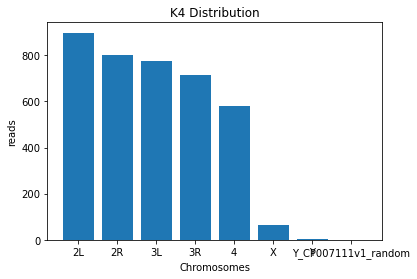

In [21]:
fig, ax = plt.subplots()
ax.bar(sorted(chr_k4.index), chr_k4 )
ax.set_title( "K4 Distribution" )
ax.set_xlabel( "Chromosomes" )
ax.set_ylabel( "reads" )
plt.show()

# Question 2.1

# Get the K9 and K27 data

In [26]:
df_k9 = pd.read_table( "../../qbb2020/data/K9me3.bed", names=bed_columns )
df_k9.loc[:,"width"] = df_k9.loc[:,"end"] - df_k9.loc[:, "start"]
chr_k9 = df_k9.loc[:,"chr"]
chr_k9 = chr_k9.value_counts()

df_k27 = pd.read_table( "../../qbb2020/data/K27me3.bed", names=bed_columns )
df_k27.loc[:,"width"] = df_k27.loc[:,"end"] - df_k27.loc[:, "start"]
chr_k27 = df_k27.loc[:,"chr"]
chr_k27 = chr_k27.value_counts()

# Plot K4, K9, K27 distributions

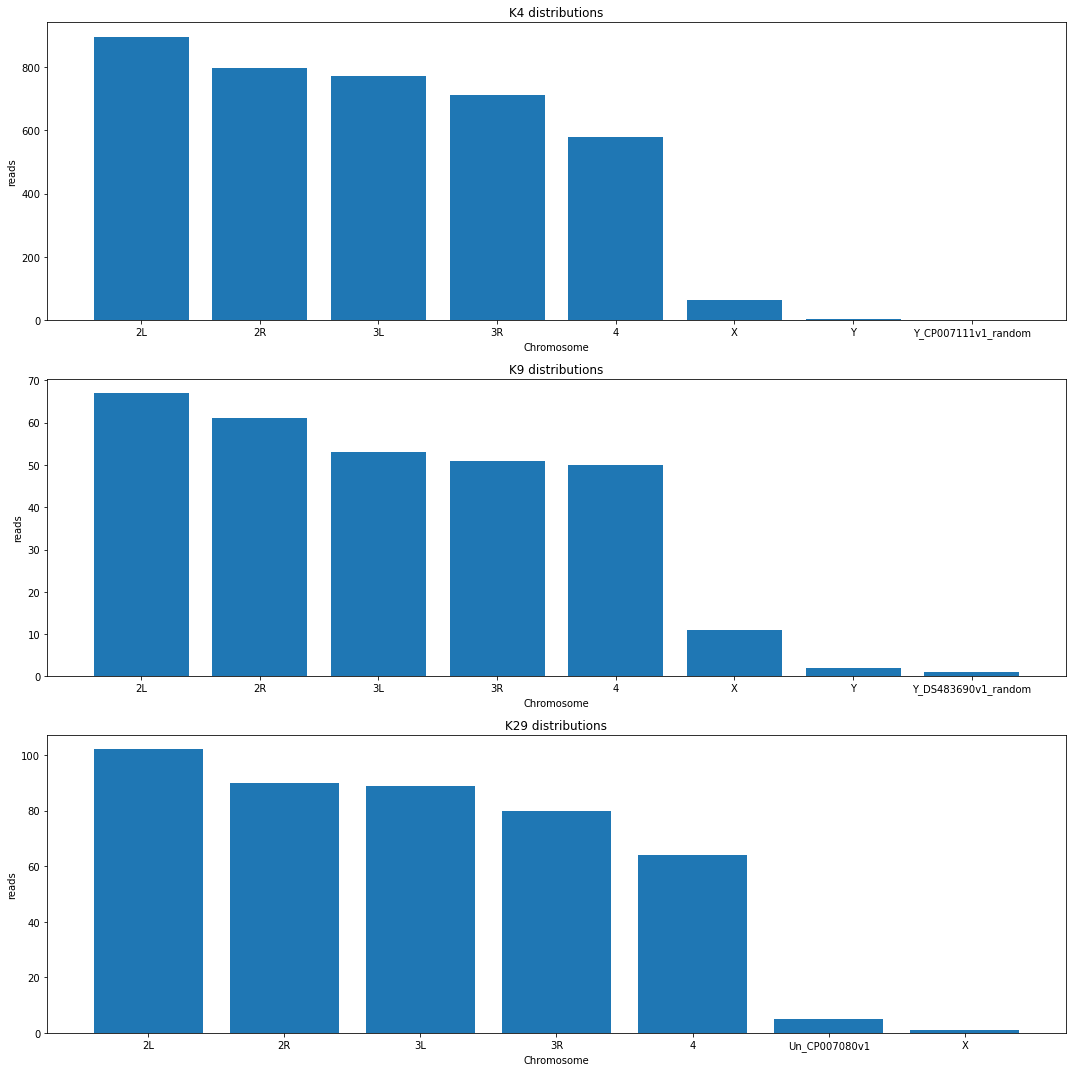

In [48]:
fig, ax = plt.subplots(3,figsize=(15,15))
ax[0].bar( sorted(chr_k4.index), chr_k4  )
ax[1].bar( sorted(chr_k9.index), chr_k9 )
ax[2].bar( sorted(chr_k27.index), chr_k27 )

ax[0].set_title( "K4 distributions" )
ax[1].set_title( "K9 distributions" )
ax[2].set_title( "K29 distributions" )
#Label the individual graphs

ax[0].set_xlabel( "Chromosome" )
ax[1].set_xlabel( "Chromosome" )
ax[2].set_xlabel( "Chromosome" )
#label the x axsis

ax[0].set_ylabel( "reads" )
ax[1].set_ylabel( "reads" )
ax[2].set_ylabel( "reads" )
#label the y axsis

fig.tight_layout()

plt.show()

# Question 2.2 plotting the width distribution

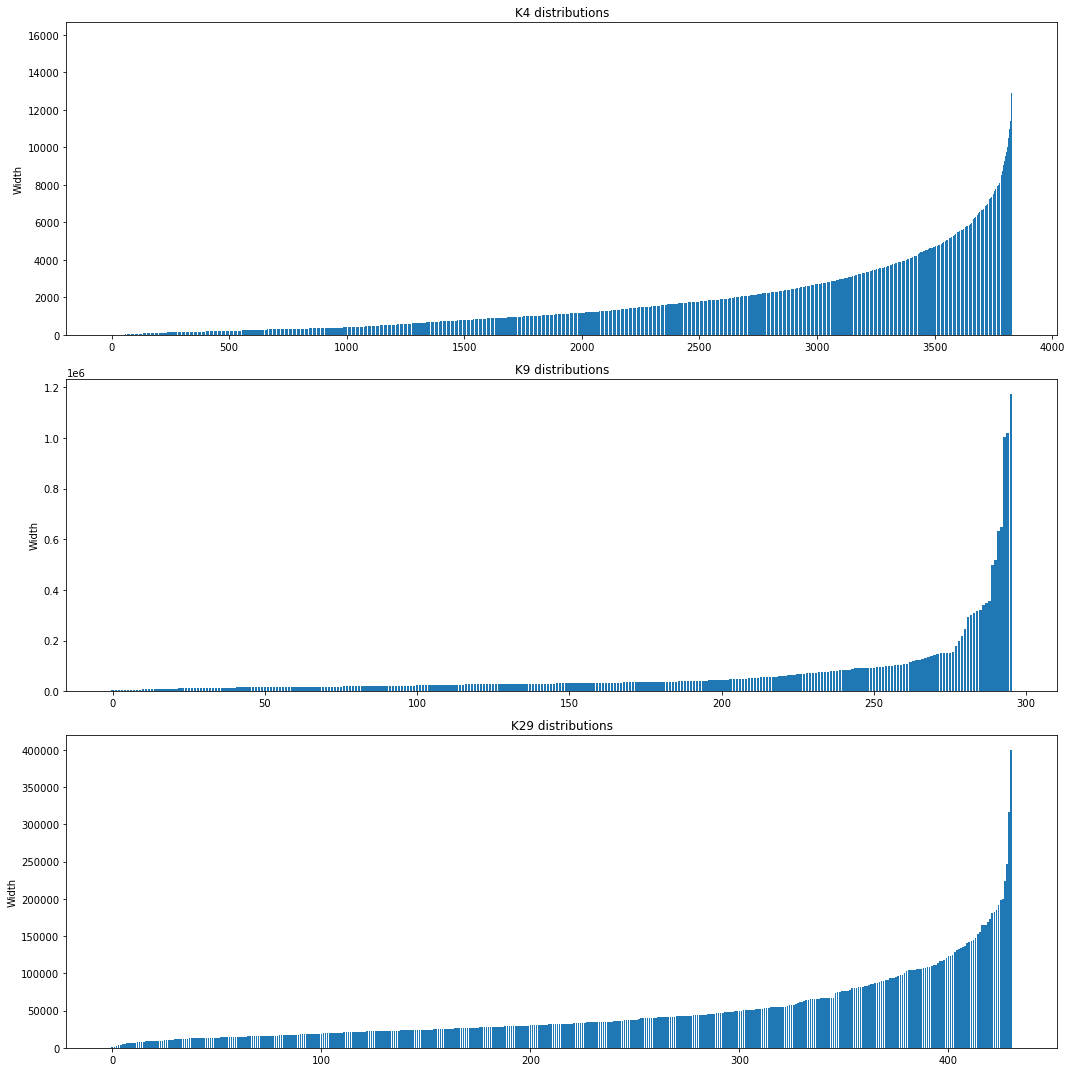

In [56]:
wid_k4 = df_k4.loc[:,"width"]
wid_k9 = df_k9.loc[:,"width"]
wid_k27 = df_k27.loc[:,"width"]

fig, ax = plt.subplots(3,figsize=(15,15))
ax[0].bar( sorted(wid_k4.index), sorted(wid_k4)  )
ax[1].bar( sorted(wid_k9.index), sorted(wid_k9) )
ax[2].bar( sorted(wid_k27.index), sorted(wid_k27) )

ax[0].set_title( "K4 distributions" )
ax[1].set_title( "K9 distributions" )
ax[2].set_title( "K29 distributions" )
#Label the individual graphs


ax[0].set_ylabel( "Width" )
ax[1].set_ylabel( "Width" )
ax[2].set_ylabel( "Width" )
#label the y axsis

fig.tight_layout()
plt.show()